Nama : Nadhif Faturrohman
E-Mail : nadip61@gmail.com
Kota : Garut

*Untuk pembagian dataset untuk training dan validation, saya membaginya secara manual dengan cara mengambil 40% dataset setiap label untuk validation dan sisanya untuk training

In [ ]:
import tensorflow as tf
import zipfile,os
lokal_zip = '/content/drive/MyDrive/ML/rps.zip'
zip_ref = zipfile.ZipFile(lokal_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

train_dir = os.path.join('/content/train')
val_dir = os.path.join('/content/val')

In [ ]:
train_p_dir = os.path.join(train_dir, 'paper')
train_r_dir = os.path.join(train_dir, 'rock')
train_s_dir = os.path.join(train_dir, 'scissors')

val_p_dir = os.path.join(val_dir, 'paper')
val_r_dir = os.path.join(val_dir, 'rock')
val_s_dir = os.path.join(val_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

In [ ]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

val_gen = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

Found 1313 images belonging to 3 classes.
Found 875 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=41,
    epochs=5,
    validation_data=val_gen,
    validation_steps=27,
    verbose=2)

Epoch 1/5
41/41 - 79s - loss: 0.0919 - accuracy: 0.9696 - val_loss: 0.0487 - val_accuracy: 0.9826
Epoch 2/5
41/41 - 78s - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0362 - val_accuracy: 0.9861
Epoch 3/5
41/41 - 78s - loss: 0.0265 - accuracy: 0.9906 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 4/5
41/41 - 78s - loss: 0.0175 - accuracy: 0.9961 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 5/5
41/41 - 78s - loss: 0.0690 - accuracy: 0.9758 - val_loss: 0.0575 - val_accuracy: 0.9803


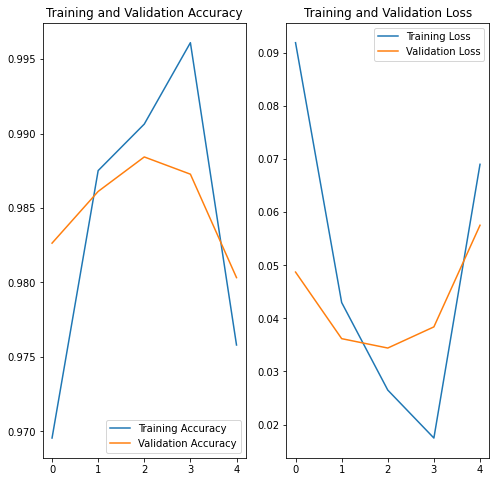

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving photo6213240900784598154.jpg to photo6213240900784598154 (12).jpg
photo6213240900784598154.jpg
Kertas


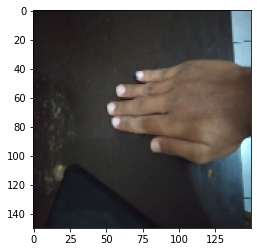

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

print(fn)
if classes[0][0]==1:
    print('Kertas')
elif classes[0][1]==1:
    print('Batu')
else:
    print('Gunting')